In [7]:
"""grover.ipynb"""

# Cell 01 - Check qiskit install

import qiskit
from IPython.display import display
from qis101_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

print(f"Qiskit SDK Version: {qiskit.__version__}")

Qiskit SDK Version: 1.4.3


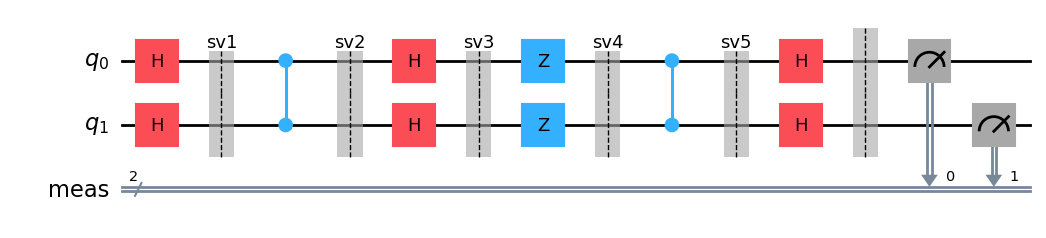

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

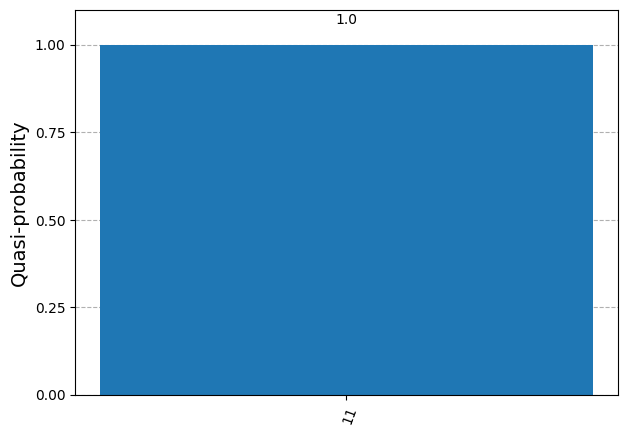

In [8]:
# Cell 02 - Grover's Algorithm (Winner is |11>)

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.save_statevector("sv1")
qc.cz(0, 1)
qc.save_statevector("sv2")
qc.h(0)
qc.h(1)
qc.save_statevector("sv3")
qc.z(0)
qc.z(1)
qc.save_statevector("sv4")
qc.cz(0, 1)
qc.save_statevector("sv5")
qc.h(0)
qc.h(1)
qc.measure_all()

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]
sv5 = result.data(0)["sv5"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(as_latex(sv5, prefix=r"\mathbf{Statevector\;5}="))

counts = result.get_counts(qc)
display(plot_distribution(counts))

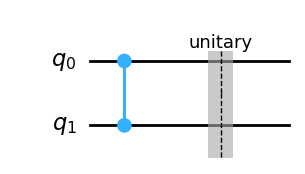

<IPython.core.display.Math object>

In [9]:
# Cell 03 - Build Grover Oracle to set |11> as winner

qc = QuantumCircuit(2)
qc.cz(0, 1)
qc.save_unitary()

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

op = result.get_unitary(qc, 3)
display(as_latex(op, prefix=r"Oracle="))

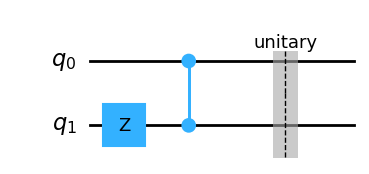

<IPython.core.display.Math object>

In [10]:
# Cell 04 - Build Grover Oracle to set |10> as winner

qc = QuantumCircuit(2)
qc.z(1)
qc.cz(0, 1)
qc.save_unitary()

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

op = result.get_unitary(qc, 3)
display(as_latex(op, prefix=r"Oracle="))

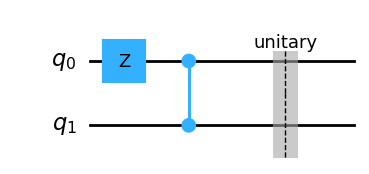

<IPython.core.display.Math object>

In [11]:
# Cell 05 - Build Grover Oracle to set |01> as winner

qc = QuantumCircuit(2)
qc.z(0)
qc.cz(0, 1)
qc.save_unitary()

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

op = result.get_unitary(qc, 3)
display(as_latex(op, prefix=r"Oracle="))

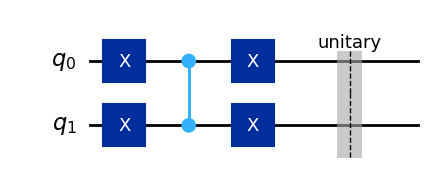

<IPython.core.display.Math object>

In [12]:
# Cell 06 - Build Grover Oracle to set |00> as winner
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cz(0, 1)
qc.x(0)
qc.x(1)
qc.save_unitary()

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

op = result.get_unitary(qc, 3)
display(as_latex(op, prefix=r"Oracle="))